<h1>Module 16 Project Template</h1>

Use the code below to help you analyze the data returned by the MBTA API:

In [81]:
mbtaURL = "https://api-v3.mbta.com/vehicles?filter[route]=1&include=trip"

import urllib.request, json
with urllib.request.urlopen(mbtaURL) as url:
    data = json.loads(url.read().decode())
   
    with open('data.json', 'w') as outfile:
        json.dump(data, outfile)
   
    with open('data.txt', 'w') as outfile:
        json.dump(json.dumps(data, indent=4, sort_keys=True), outfile)
       
    print(json.dumps(data, indent=4, sort_keys=True))


{
    "data": [
        {
            "attributes": {
                "bearing": 270,
                "current_status": "IN_TRANSIT_TO",
                "current_stop_sequence": 22,
                "direction_id": 1,
                "label": "1909",
                "latitude": 42.33265,
                "longitude": -71.08057,
                "occupancy_status": "MANY_SEATS_AVAILABLE",
                "speed": null,
                "updated_at": "2022-03-28T07:06:38-04:00"
            },
            "id": "y1909",
            "links": {
                "self": "/vehicles/y1909"
            },
            "relationships": {
                "route": {
                    "data": {
                        "id": "1",
                        "type": "route"
                    }
                },
                "stop": {
                    "data": {
                        "id": "62",
                        "type": "stop"
                    }
                },
                "trip": {

Use the code below to read the data from your MySQL database and store it in a pandas dataframe.  

You you need to install pymysql to run the code:

In [82]:
pip install pymysql

Note: you may need to restart the kernel to use updated packages.


In [83]:
import os
import pymysql
import pandas as pd

host = '127.0.0.1'
port = '3306'
user = 'lucy'
password = 'password123'
database = 'MBTAdb'

conn = pymysql.connect(
    host=host,
    port=int(3306),
    user="lucy",
    passwd=password,
    db=database,
    charset='utf8mb4')

df = pd.read_sql_query("SELECT * FROM mbta_buses", conn)

df.tail(10)

,record_num,id,latitude,longitude,direction_id,occupancy_status,current_status,current_stop_sequence,updated_at
24111,24112,y1736,42.331962,-71.081758,0.0,MANY_SEATS_AVAILABLE,IN_TRANSIT_TO,1,2022-03-28 11:06:34
24112,24113,y1909,42.332650,-71.080570,1.0,MANY_SEATS_AVAILABLE,IN_TRANSIT_TO,22,2022-03-28 11:06:38
24113,24114,y1883,42.336187,-71.076541,0.0,MANY_SEATS_AVAILABLE,IN_TRANSIT_TO,8,2022-03-28 11:06:42
24114,24115,y1875,42.338690,-71.079560,0.0,MANY_SEATS_AVAILABLE,IN_TRANSIT_TO,9,2022-03-28 11:06:12
24115,24116,y1869,42.351749,-71.090019,1.0,FEW_SEATS_AVAILABLE,IN_TRANSIT_TO,11,2022-03-28 11:06:45
24116,24117,y1850,42.329850,-71.083520,0.0,None,IN_TRANSIT_TO,1,2022-03-28 11:06:30
24117,24118,y1820,42.341605,-71.083176,0.0,FEW_SEATS_AVAILABLE,IN_TRANSIT_TO,10,2022-03-28 11:06:44
24118,24119,y1813,42.373100,-71.117510,0.0,MANY_SEATS_AVAILABLE,IN_TRANSIT_TO,1,2022-03-28 11:06:37
24119,24120,y1775,42.363152,-71.099867,1.0,MANY_SEATS_AVAILABLE,IN_TRANSIT_TO,8,2022-03-28 11:06:43
24120,24121,y1736,42.331219,-71.082595,0.0,MANY_SEATS_AVAILABLE,IN_TRANSIT_TO,1,2022-03-28 11:06:46



The code below saves the data as a csv file to the local directory as a backup.

In [84]:
df.to_csv('mbta.csv')

<h1>What is the average time it takes for a bus to complete the route</h1>

In [85]:
#create a dataframe sorted by id and updated_at

df_sorted = df.sort_values(by=['id', 'updated_at'])
df_sorted.tail()

,record_num,id,latitude,longitude,direction_id,occupancy_status,current_status,current_stop_sequence,updated_at
21913,21914,y1918,42.341698,-71.062210,1.0,MANY_SEATS_AVAILABLE,IN_TRANSIT_TO,1,2022-03-28 02:28:07
21917,21918,y1918,42.342283,-71.061969,1.0,MANY_SEATS_AVAILABLE,IN_TRANSIT_TO,1,2022-03-28 02:28:14
21921,21922,y1918,42.342878,-71.061851,1.0,MANY_SEATS_AVAILABLE,IN_TRANSIT_TO,1,2022-03-28 02:28:27
21925,21926,y1918,42.342644,-71.061880,1.0,MANY_SEATS_AVAILABLE,IN_TRANSIT_TO,1,2022-03-28 02:28:36
21929,21930,y1918,42.343350,-71.061142,1.0,MANY_SEATS_AVAILABLE,IN_TRANSIT_TO,1,2022-03-28 02:28:49


In [86]:
myList = df_sorted.id.unique()
print(myList)

['y1729' 'y1735' 'y1736' 'y1741' 'y1750' 'y1752' 'y1769' 'y1775' 'y1781'
 'y1785' 'y1797' 'y1812' 'y1813' 'y1820' 'y1838' 'y1842' 'y1850' 'y1855'
 'y1863' 'y1869' 'y1875' 'y1883' 'y1886' 'y1904' 'y1909' 'y1910' 'y1912'
 'y1918']


In [87]:
# testing the sub-frame code for the subsequent code section in the cell right after this one
for busId in myList:
    rslt_df = df_sorted.loc[df_sorted['id']==busId]
    init_time = rslt_df.iloc[0,8]
    init_direc = rslt_df.iloc[0,4]
    print (rslt_df)
    print (init_time - init_time)
    print (init_direc)
    break

      record_num     id   latitude  longitude  direction_id  \
4075        4076  y1729  42.336237 -71.077392           0.0   
4081        4082  y1729  42.335487 -71.078337           0.0   
4087        4088  y1729  42.334375 -71.079452           0.0   
4093        4094  y1729  42.333626 -71.080467           0.0   
4099        4100  y1729  42.333212 -71.080813           0.0   
...          ...    ...        ...        ...           ...   
9779        9780  y1729  42.354692 -71.091400           1.0   
9786        9787  y1729  42.346762 -71.087436           1.0   
9793        9794  y1729  42.346762 -71.087436           1.0   
9800        9801  y1729  42.346730 -71.087480           1.0   
9807        9808  y1729  42.346703 -71.087432           1.0   

          occupancy_status current_status current_stop_sequence  \
4075  MANY_SEATS_AVAILABLE  IN_TRANSIT_TO                     1   
4081  MANY_SEATS_AVAILABLE  IN_TRANSIT_TO                     1   
4087  MANY_SEATS_AVAILABLE  IN_TRANSIT_TO 

In [88]:
# calculating the average time it takes for a trip within all the trips for a specific busId and further averaging it across all busIDs
for busId in myList:
    rslt_df = df_sorted.loc[df_sorted['id']==busId] 
    init_time = rslt_df.iloc[0,8]
    init_direc = rslt_df.iloc[0,4]
    counter = 1
    time_completeRoute = init_time - init_time
    num = 1
    for i in range(len(rslt_df)):
        curr_direc = rslt_df.iloc[i,4]
        if curr_direc != init_direc:
            final_time = rslt_df.iloc[i,8]
            time_completeRoute = time_completeRoute + (final_time - init_time)
            avg_time = time_completeRoute/counter
            counter += 1
            init_time = final_time
            init_direc = curr_direc      
    average_timebusId = avg_time/num
    num += 1 
print(average_timebusId)
    

0 days 01:30:23


<h1>Provide a Visualization based on the data</h1>

{'busId': ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28'], 'trip_time_minutes': [56.47666666666667, 47.1, 47.1, 20.063333333333333, 46.22738095, 43.41, 49.23888888333333, 38.15, 40.75714285, 71.22777776666666, 45.680701750000004, 45.342708333333334, 41.766666666666666, 194.46, 42.96, 45.21333333333334, 45.21333333333334, 50.208333333333336, 38.94166666666667, 33.0611111, 46.85, 39.55416666666667, 46.940000000000005, 34.830000000000005, 1416.25, 52.08888888333333, 14.666666666666666, 90.38333333333334]}
   busId  trip_time_minutes
0      1          56.476667
1      2          47.100000
2      3          47.100000
3      4          20.063333
4      5          46.227381
5      6          43.410000
6      7          49.238889
7      8          38.150000
8      9          40.757143
9     10          71.227778
10    11          45.680702
11    12          45.342708
12    13        

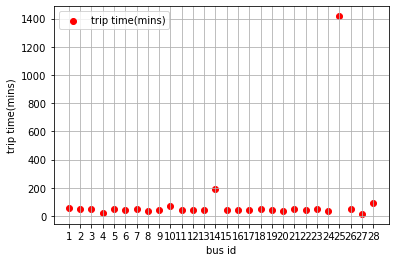

In [96]:
import matplotlib.pyplot as plt

dict = {}

# create x labels as proxy for bus ID - to fit better on the x-axis of the plot
xLabels = []
for i in range(len(myList)):
    xLabels.append(str(i+1))
    
dict['busId'] = xLabels
    
new_lst = []
for busId in myList:
    rslt_df = df_sorted.loc[df_sorted['id']==busId] 
    init_time = rslt_df.iloc[0,8]
    init_direc = rslt_df.iloc[0,4]
    counter = 1
    time_completeRoute = init_time - init_time
    num = 1
    for i in range(len(rslt_df)):
        curr_direc = rslt_df.iloc[i,4]
        if curr_direc != init_direc:
            final_time = rslt_df.iloc[i,8]
            time_completeRoute = time_completeRoute + (final_time - init_time)
            avg_time = time_completeRoute/counter
            counter += 1
            init_time = final_time
            init_direc = curr_direc      
    new_lst.append(avg_time.total_seconds() / 60)
dict['trip_time_minutes']=new_lst
print(dict)

# Convert the dictionary into DataFrame
my_df = pd.DataFrame(dict, columns = ['busId', 'trip_time_minutes'])
print(my_df)

# create scatter plot using matplotlib
plt.scatter(my_df['busId'],my_df['trip_time_minutes'],label = 'trip time(mins)',color ='r')
plt.legend(loc=2)
plt.ylabel('trip time(mins)')
plt.xlabel('bus id')
plt.autoscale(enable=True, axis='both', tight=None)
plt.grid()

<AxesSubplot:xlabel='busId', ylabel='trip_time_minutes'>

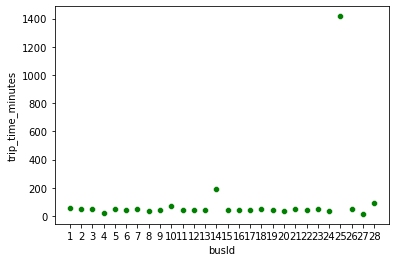

In [97]:
import seaborn as sns
sns.scatterplot(data=my_df, x="busId", y="trip_time_minutes",color = "g")

<h1>Give an estimate of the speed of the bus from current_stop_sequence = 1 to the last  current_stop_sequence. </h1> 

Note: You can use the haversine Python library to calculate the distance between two points, given two longitude and latitude coordinates.

In [98]:
pip install haversine

Note: you may need to restart the kernel to use updated packages.


In [99]:
from haversine import haversine, Unit
for busId in myList:
    rslt_df = df_sorted.loc[df_sorted['id']==busId]
    start = None
    stop = None
    for i in range(len(rslt_df)):
        stop_sequence = rslt_df.iloc[i,7]
        direction = rslt_df.iloc[i,4]
        if direction == 0:
            if stop_sequence == '1':
                init_lat = rslt_df.iloc[i,2]
                init_lon = rslt_df.iloc[i,3]
                start = (init_lat,init_lon)
            elif stop_sequence == '24':
                final_lat = rslt_df.iloc[i,2]
                final_lon = rslt_df.iloc[i,3]
                stop = (final_lat,final_lon)
        if start!=None and stop!=None:
            break
    if start!=None and stop!=None:
        break

# calculate distance in Kms using haversine function
distance = haversine(start,stop)
print(start)
print(stop)
f"the distance in Km's is: {distance}"
            

(42.32989, -71.08369)
(42.37273562, -71.11650132)


"the distance in Km's is: 5.474295561420971"

In [100]:
# calculate speed in Km's/Hr

#calculate averge trip time in Hrs. from time delta above 
trip_durationHrs = average_timebusId.total_seconds() / 3600
print(trip_durationHrs)

# calculate speed based on distance in Kms divided by trip time calculated in Hrs.
speed = distance/trip_durationHrs
f"the speed in Km/hr is: {speed}"

1.506388888888889


'the speed in Km/hr is: 3.6340520046312914'